In [1]:
##Import statement
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
pd.set_option('display.max.columns',None)

In [2]:
#load data set
df = pd.read_csv('./dataset/climate_data.csv')
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
#view the top 10 rows of the dataset
df.head()

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute,Maximum temperature (°F),Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,0.0,40.0,34.0,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,0.0,52.0,37.0,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,0.0,41.0,6.0,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,0.0,19.0,-0.0,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,0.0,30.0,15.0,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665


In [4]:
#view the dimensions of the dataframe
df.shape

(3902, 23)

In [6]:
#view Dtype of each features in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3902 entries, 0 to 3901
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      3902 non-null   object 
 1   Average temperature (°F)  3902 non-null   float64
 2   Average humidity (%)      3902 non-null   float64
 3   Average dewpoint (°F)     3902 non-null   float64
 4   Average barometer (in)    3902 non-null   float64
 5   Average windspeed (mph)   3902 non-null   float64
 6   Average gustspeed (mph)   3902 non-null   float64
 7   Average direction (°deg)  3902 non-null   float64
 8   Rainfall for month (in)   3902 non-null   float64
 9   Rainfall for year (in)    3902 non-null   float64
 10  Maximum rain per minute   3902 non-null   float64
 11  Maximum temperature (°F)  3902 non-null   float64
 12  Minimum temperature (°F)  3902 non-null   float64
 13  Maximum humidity (%)      3902 non-null   float64
 14  Minimum 

In [5]:
df.columns.values

array(['Date', 'Average temperature (°F)', 'Average humidity (%)',
       'Average dewpoint (°F)', 'Average barometer (in)',
       'Average windspeed (mph)', 'Average gustspeed (mph)',
       'Average direction (°deg)', 'Rainfall for month (in)',
       'Rainfall for year (in)', 'Maximum rain per minute',
       'Maximum temperature (°F)', 'Minimum temperature (°F)',
       'Maximum humidity (%)', 'Minimum humidity (%)', 'Maximum pressure',
       'Minimum pressure', 'Maximum windspeed (mph)',
       'Maximum gust speed (mph)', 'Maximum heat index (°F)', 'Date1',
       'Month', 'diff_pressure'], dtype=object)

In [7]:
#check which columns should be categorical
print('Column name')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Column name
Date 3902
Date1 3902


In [8]:
print(df.isnull().any())

Date                        False
Average temperature (°F)    False
Average humidity (%)        False
Average dewpoint (°F)       False
Average barometer (in)      False
Average windspeed (mph)     False
Average gustspeed (mph)     False
Average direction (°deg)    False
Rainfall for month (in)     False
Rainfall for year (in)      False
Maximum rain per minute     False
Maximum temperature (°F)    False
Minimum temperature (°F)    False
Maximum humidity (%)        False
Minimum humidity (%)        False
Maximum pressure            False
Minimum pressure            False
Maximum windspeed (mph)     False
Maximum gust speed (mph)    False
Maximum heat index (°F)     False
Date1                       False
Month                       False
diff_pressure               False
dtype: bool


In [9]:
df.describe()

,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute,Maximum temperature (°F),Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Month,diff_pressure
count,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.0,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000
mean,44.670733,48.878011,23.127037,29.881420,5.758893,10.011968,216.037417,0.451105,5.486171,0.0,57.561661,31.227524,73.673757,26.016914,30.045451,29.701622,19.840748,33.974910,58.086315,6.395695,0.343829
std,15.326793,17.438153,14.634088,0.250395,4.022485,14.117446,97.677761,0.603462,4.534444,0.0,17.755874,14.124424,20.380611,15.623870,0.258140,0.451691,12.235410,38.632424,17.953453,3.430231,0.407499
min,-12.100000,9.000000,-22.200000,28.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-6.100000,-27.700000,1.000000,0.000000,29.338000,13.266000,0.000000,0.000000,-6.100000,1.000000,0.000000
25%,33.700000,36.000000,12.100000,29.700000,2.700000,4.500000,116.000000,0.050000,0.980000,0.0,43.900000,23.000000,63.000000,15.000000,29.866000,29.562000,13.800000,19.600000,43.900000,3.000000,0.220000
50%,45.100000,47.000000,22.500000,29.900000,4.600000,7.100000,253.000000,0.220000,5.080000,0.0,57.250000,32.800000,81.000000,22.000000,30.016000,29.711000,18.400000,27.600000,57.200000,6.000000,0.293000
75%,58.000000,61.000000,35.400000,30.000000,8.000000,12.100000,282.000000,0.670000,9.047500,0.0,73.200000,41.800000,89.000000,32.000000,30.203000,29.869000,24.200000,34.500000,77.300000,9.000000,0.395000
max,76.300000,94.000000,55.100000,31.000000,26.400000,240.400000,360.000000,4.480000,16.410000,0.0,92.700000,65.700000,100.000000,90.000000,31.204000,30.855000,181.700000,255.300000,88.400000,12.000000,16.602000


from the data we can see that Maximum rain perminute values is zero, so i assume that it will not use.

In [10]:
print(df.loc[df["Date"] != df["Date1"]])


Empty DataFrame
Columns: [Date, Average temperature (°F), Average humidity (%), Average dewpoint (°F), Average barometer (in), Average windspeed (mph), Average gustspeed (mph), Average direction (°deg), Rainfall for month (in), Rainfall for year (in), Maximum rain per minute, Maximum temperature (°F), Minimum temperature (°F), Maximum humidity (%), Minimum humidity (%), Maximum pressure, Minimum pressure, Maximum windspeed (mph), Maximum gust speed (mph), Maximum heat index (°F), Date1, Month, diff_pressure]
Index: []


Date and Date1 parameters same. i will drop Date1 with other parameters that i think will not used.

In [11]:
##droping the columns
cuaca = df.drop(["Average gustspeed (mph)", "Average direction (°deg)", "Rainfall for year (in)", "Maximum pressure", "Maximum rain per minute", "Maximum temperature (°F)", "Minimum temperature (°F)", "Maximum humidity (%)", "Minimum humidity (%)", "Maximum pressure", "Minimum pressure", "Maximum windspeed (mph)", "Maximum gust speed (mph)", "Maximum heat index (°F)", "Date1", "Month", "diff_pressure"], axis = 1)
cuaca.head()

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Rainfall for month (in)
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,0.0
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,0.0
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,0.0
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,0.0
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,0.0


In [12]:
cuaca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3902 entries, 0 to 3901
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      3902 non-null   object 
 1   Average temperature (°F)  3902 non-null   float64
 2   Average humidity (%)      3902 non-null   float64
 3   Average dewpoint (°F)     3902 non-null   float64
 4   Average barometer (in)    3902 non-null   float64
 5   Average windspeed (mph)   3902 non-null   float64
 6   Rainfall for month (in)   3902 non-null   float64
dtypes: float64(6), object(1)
memory usage: 213.5+ KB


In [13]:
cuaca.shape

(3902, 7)

data frame shape change from (3902,23) become (3902,7)

In [14]:
print('Column name')
for col in cuaca.columns:
    if cuaca[col].dtype=='object':
        print(col, cuaca[col].nunique())

Column name
Date 3902


In [15]:
currentLabels = list(cuaca.columns)

##change coloumn names 
newLabels = ["Temperature", "Humidity", "Dewpoint", "Pressure", "Windspeed", "Rainfall"]
numLabels = len(newLabels)

##loop to change the column names
for i in range(0,numLabels):
    cuaca = cuaca.rename(columns = {currentLabels[i + 1] : newLabels[i]})
    
cuaca.head()

,Date,Temperature,Humidity,Dewpoint,Pressure,Windspeed,Rainfall
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,0.0
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,0.0
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,0.0
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,0.0
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,0.0


In [16]:
cuaca.describe()

,Temperature,Humidity,Dewpoint,Pressure,Windspeed,Rainfall
count,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000
mean,44.670733,48.878011,23.127037,29.881420,5.758893,0.451105
std,15.326793,17.438153,14.634088,0.250395,4.022485,0.603462
min,-12.100000,9.000000,-22.200000,28.200000,0.000000,0.000000
25%,33.700000,36.000000,12.100000,29.700000,2.700000,0.050000
50%,45.100000,47.000000,22.500000,29.900000,4.600000,0.220000
75%,58.000000,61.000000,35.400000,30.000000,8.000000,0.670000
max,76.300000,94.000000,55.100000,31.000000,26.400000,4.480000


In [17]:
cuaca["Rainfall"].value_counts()

0.00    549
0.05    116
0.02    114
0.04     97
0.20     95
       ... 
3.71      1
1.24      1
2.12      1
1.20      1
1.67      1
Name: Rainfall, Length: 234, dtype: int64

In [18]:
#numer = ['Temperature','Humidity', 'Dewpoint', 'Pressure', 'Windspeed']
#for col in numer: # coerce for missing values
    cuaca[col] = pd.to_numeric(cuaca[col], errors='coerce')

#categ = ['Rainfall']
#for col in categ:
    cuaca[col] = cuaca[col].astype('category')

#cuaca['Date'] = pd.to_datetime(cuaca['Date'], errors='coerce')

#cuaca.head()

IndentationError: unexpected indent (<ipython-input-18-63e261eceac6>, line 3)

In [19]:
for x in categ:
    print(cuaca[x].value_counts(),'\n')

NameError: name 'categ' is not defined

In [20]:
cuaca.axes

[RangeIndex(start=0, stop=3902, step=1),
 Index(['Date', 'Temperature', 'Humidity', 'Dewpoint', 'Pressure', 'Windspeed',
        'Rainfall'],
       dtype='object')]

In [21]:
missing = cuaca.isnull().sum()/len(cuaca)*100

print(pd.DataFrame([missing[missing>0],pd.Series(cuaca.isnull().sum()[cuaca.isnull().sum()>1000])], index=['percent missing','how many missing']))

Empty DataFrame
Columns: []
Index: [percent missing, how many missing]


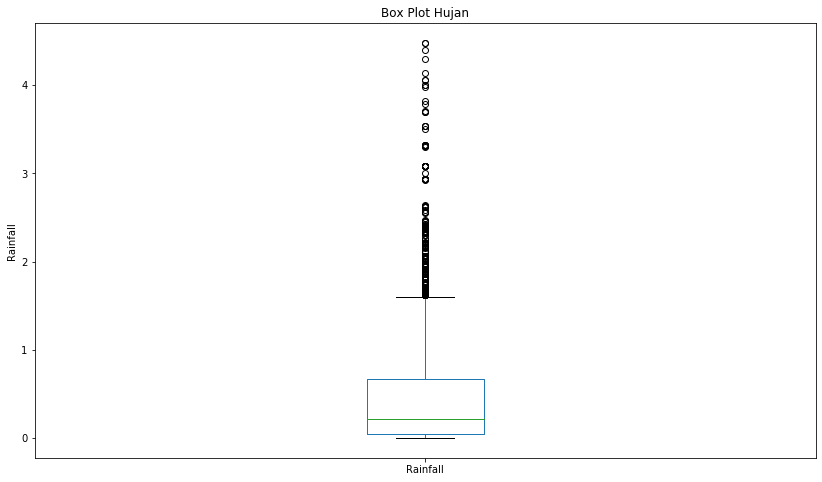

In [22]:
cuaca ['Rainfall'].plot(kind='box',figsize=(14,8))
plt.title('Box Plot Hujan')
plt.ylabel('Rainfall')
plt.show()

In [23]:
cuaca

,Date,Temperature,Humidity,Dewpoint,Pressure,Windspeed,Rainfall
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,0.00
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,0.00
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,0.00
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,0.00
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,0.00
...,...,...,...,...,...,...,...
3897,2020-07-24,64.1,62.0,49.8,29.6,3.6,0.24
3898,2020-07-25,62.8,60.0,48.1,29.7,2.5,0.33
3899,2020-07-26,60.6,68.0,48.9,29.8,1.7,0.33
3900,2020-07-27,61.7,64.0,47.4,29.9,2.2,0.33


In [24]:
cuaca = cuaca.drop(['Date'], axis=1)

Data Transform

In [25]:
from sklearn.preprocessing import LabelEncoder
kelembaban_label = cuaca['Humidity'].values
print('data kelembaban before: ',kelembaban_label)
label_encoder = LabelEncoder().fit(kelembaban_label)
kelembaban_label_after = label_encoder.transform(kelembaban_label)
print('data kelembaban after: ',kelembaban_label_after)
print('class before transform: ',label_encoder.classes_)

data kelembaban before:  [35. 32. 60. ... 68. 64. 61.]
data kelembaban after:  [26 23 51 ... 59 55 52]
class before transform:  [ 9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26.
 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44.
 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62.
 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80.
 81. 82. 83. 84. 85. 86. 87. 88. 89. 90. 91. 92. 93. 94.]


In [26]:
from sklearn.preprocessing import LabelEncoder
target_label = cuaca['Rainfall'].values
print('data hujan before: ',target_label)
label_encoder = LabelEncoder().fit(target_label)
target_label_after = label_encoder.transform(target_label)
print('data hujan after: ',target_label_after)
print('class before transform: ',label_encoder.classes_)

data hujan before:  [0.   0.   0.   ... 0.33 0.33 0.35]
data hujan after:  [ 0  0  0 ... 33 33 35]
class before transform:  [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.09 1.1  1.12 1.13
 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25 1.27 1.28
 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39 1.4  1.41 1.42 1.43
 1.44 1.45 1.46 1.47 1.49 1.5  1.51 1.52 1.53 1.54 1.56 1.58 1.59 1.6
 1.62 1.64 1.65 1.66 1.67 1.68 1.69 1.7  1.71 1.73 1.74 1.76 1.77 1.8
 1.83 1.86 1.87 1.88 1.89 

In [28]:
cuaca['kelembaban_label_encode'] = kelembaban_label_after
cuaca['target_label_encode'] = target_label_after
cuaca[['Humidity','kelembaban_label_encode','Rainfall','target_label_encode']].tail()

,Humidity,kelembaban_label_encode,Rainfall,target_label_encode
3897,62.0,53,0.24,24
3898,60.0,51,0.33,33
3899,68.0,59,0.33,33
3900,64.0,55,0.33,33
3901,61.0,52,0.35,35


In [ ]:
#from sklearn.linear_model import LogisticRegression
#pertama dengna mengubah label pada precip type
#from sklearn.preprocessing import LabelEncoder
#target_label = cuaca['Rainfall'].values
#print('data hujan before: ',target_label)
#label_encoder = LabelEncoder().fit(target_label)
#target_label_after = label_encoder.transform(target_label)
#print('data hujan after: ',target_label_after)
#print('class before transform: ',label_encoder.classes_)

#from sklearn.metrics import classification_report,confusion_matrix


In [29]:
from sklearn.model_selection import train_test_split

#features_data = df[['age']].values.reshape(-1,1)
#features_data = df[['age','job_label_encode']].values
features_data = cuaca[['Temperature','Humidity', 'Dewpoint', 'Pressure', 'Windspeed' ]].values
target_data = cuaca[['target_label_encode']].values.reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(features_data,target_data,test_size=0.25)
#x_train
y_test = y_test.reshape(len(y_test))
y_train = y_train.reshape(len(y_train))
print('shape feature total: ',features_data.shape)
print('shape feature train: ',x_train.shape)
print('shape feature test: ',x_test.shape)
print('shape target test: ',y_test.shape)

shape feature total:  (3902, 5)
shape feature train:  (2926, 5)
shape feature test:  (976, 5)
shape target test:  (976,)


In [30]:
x_train

array([[ 41.3,  30. ,  11.1,  30. ,  12.8],
       [ 34.8,  39. ,  11.1,  29.7,  13.6],
       [ 63. ,  63. ,  47.8,  29.8,   3.6],
       ...,
       [-12.1,  63. , -21.1,  30.8,   2.4],
       [ 27.6,  45. ,   8.5,  29.8,   2.1],
       [ 37. ,  57. ,  21.8,  29.5,   9.3]])

Creating Model

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#model = GaussianNB().fit(x_train,y_train)
#model = DecisionTreeClassifier().fit(x_train,y_train)
model = RandomForestClassifier().fit(x_train,y_train)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
y_train_prediksi = model.predict(x_train)
y_train_prediksi

array([ 18,  47, 129, ...,   0,   0,   4], dtype=int64)

In [33]:
performance_model_train = model.score(x_train,y_train)
print('performance model data train: ',performance_model_train)

performance model data train:  1.0


In [34]:
y_test_prediksi = model.predict(x_test)
performance_model_test = model.score(x_test,y_test_prediksi)
print('performance model data test: ',performance_model_test)

performance model data test:  1.0


In [35]:
from sklearn.metrics import classification_report,confusion_matrix
hasil_confusion_matrix_train = confusion_matrix(y_train,y_train_prediksi)
hasil_confusion_matrix_train

array([[415,   0,   0, ...,   0,   0,   0],
       [  0,  66,   0, ...,   0,   0,   0],
       [  0,   0,  80, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   2,   0,   0],
       [  0,   0,   0, ...,   0,   1,   0],
       [  0,   0,   0, ...,   0,   0,   2]], dtype=int64)

In [36]:
hasil_confusion_matrix_test = confusion_matrix(y_test,y_test_prediksi)
hasil_confusion_matrix_test

array([[65,  5,  3, ...,  0,  0,  0],
       [ 3,  1,  1, ...,  0,  0,  0],
       [11,  1,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use(['ggplot'])

fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(hasil_confusion_matrix_train)
ax.grid(False)
for i in range(len(hasil_confusion_matrix_train[0])):
    for j in range(len(hasil_confusion_matrix_train[0])):
        ax.text(j,i,hasil_confusion_matrix_train[i,j])
plt.show()

In [39]:
import pickle
pickle.dump(model,open('./model.pkl','wb'))

In [40]:
import pickle
model_open = pickle.load(open('./model.pkl','rb'))

In [45]:
import numpy as np
data_input = np.array([25,30,34,32,31]).reshape(1,-1)
data_input.shape

(1, 5)

In [46]:
model.predict(data_input)

array([0], dtype=int64)

In [47]:
model_open.predict(data_input)

array([0], dtype=int64)

In [49]:
temp_precip_group=cuaca.groupby(by=['Temperature','Rainfall'])['Temperature'].count()
temp_precip_group

Temperature  Rainfall
-12.1        0.00        1
-11.9        0.01        1
-9.6         0.22        1
-9.1         0.13        1
-6.7         0.25        1
                        ..
 74.8        0.00        1
 74.9        0.27        1
 75.3        0.27        1
 76.3        0.10        1
             0.27        1
Name: Temperature, Length: 3544, dtype: int64